<a href="https://colab.research.google.com/github/Sandymyatnoe/Sandymyatnoe/blob/main/LogitsRegressionPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import pandas as pd

In [120]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [121]:
n_samples=1000
X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

In [122]:
X[:5], y[:5], len(X), len(y), type(X), type(y)

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]),
 1000,
 1000,
 numpy.ndarray,
 numpy.ndarray)

In [123]:
circles=pd.DataFrame({"X1":X[:,0],
                      "X2":X[:,1],
                      "label":y})
circles.head(5)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


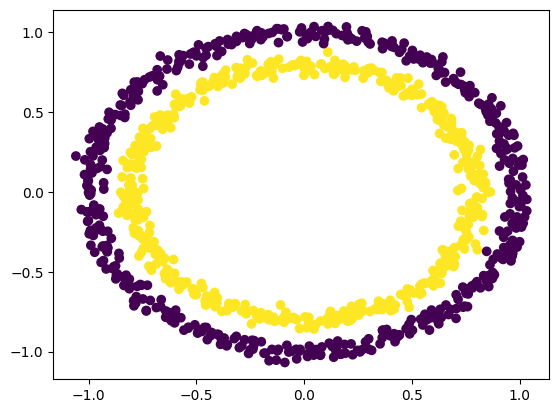

In [124]:
plt.scatter(x=X[:,0], y=X[:,1], c=y)

In [125]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)


In [126]:
X[:5], X.dtype, y[:5], y.dtype

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 torch.float32,
 tensor([1., 1., 1., 1., 0.]),
 torch.float32)

In [127]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=True)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

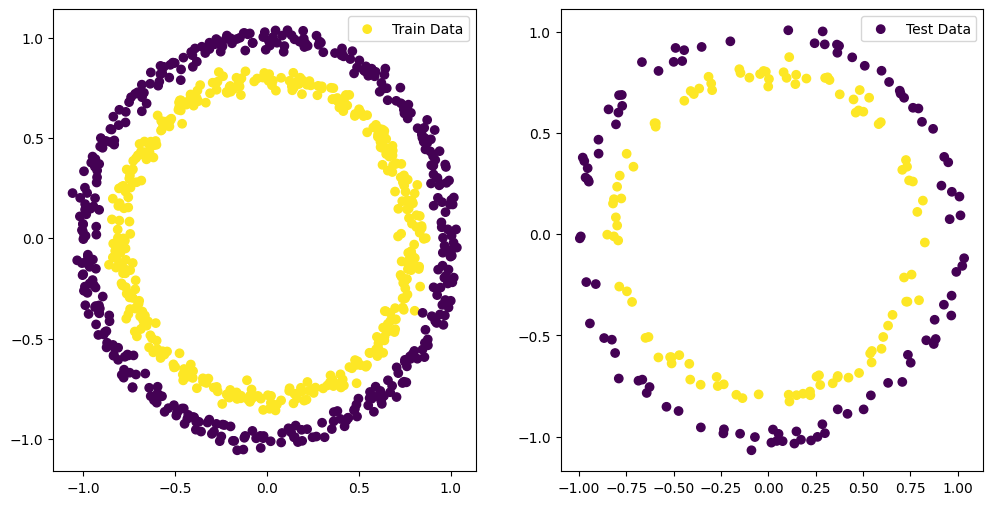

In [128]:

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x=X_train[:,0],y=X_train[:,1], c=y_train, label="Train Data")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(x=X_test[:,0],y=X_test[:,1], c=y_test, label="Test Data")
plt.legend()




In [129]:
X_train=X_train.to(device)
X_test=X_test.to(device)
y_train=y_train.to(device)
y_test=y_test.to(device)

In [130]:
class Circlemodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2, out_features=100)
    self.layer2=nn.Linear(in_features=100, out_features=50)
    self.layer3=nn.Linear(in_features=50, out_features=20)
    self.layer4=nn.Linear(in_features=20, out_features=1)
    self.relu=nn.ReLU()

  def forward(self,x):
    return self.layer4(self.relu(self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))))

model=Circlemodel().to(device)
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-5.6659e-01,  6.4690e-01],
                      [ 5.1166e-01, -4.2760e-01],
                      [ 4.1915e-01,  6.8028e-01],
                      [-5.8341e-02,  2.9572e-01],
                      [ 3.0288e-01, -8.0199e-02],
                      [ 1.7503e-01, -2.1499e-02],
                      [ 6.4903e-01, -2.0648e-01],
                      [-5.6685e-01, -4.5994e-01],
                      [ 3.4725e-01, -3.1226e-01],
                      [ 3.5044e-01, -6.8435e-01],
                      [-6.1640e-01, -2.7225e-01],
                      [-6.9293e-01, -6.1632e-01],
                      [-2.7347e-01, -2.5927e-01],
                      [-2.9920e-01, -5.3313e-01],
                      [-5.3389e-01, -2.6180e-01],
                      [ 6.8873e-01, -6.3918e-01],
                      [-4.7680e-01, -5.3107e-01],
                      [ 2.3487e-02, -3.8388e-01],
                      [-6.2271e-01, -6.4212e-01],
                   

In [131]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model.parameters(),
                          lr=0.1)

In [132]:
def accuracy_fn(y_true, y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_true))*100
  return acc

In [133]:
epochs=3000

for epoch in range(epochs):
  model.train()

  y_logit=model(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logit))

  loss=loss_fn(y_logit, y_train)
  acc=accuracy_fn(y_train, y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()

  with torch.inference_mode():

    test_logit=model(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logit))

    test_loss=loss_fn(test_logit, y_test)
    test_acc=accuracy_fn(y_test, test_pred)

  if epoch%100==0:
    print(f"Epoch:{epoch}| Train loss:{loss}|Train Acc:{acc}| Test loss:{test_loss}| Test Acc:{test_acc}")

Epoch:0| Train loss:0.6950943470001221|Train Acc:50.24999999999999| Test loss:0.6975849866867065| Test Acc:49.0
Epoch:100| Train loss:0.6889880895614624|Train Acc:52.87500000000001| Test loss:0.6910061836242676| Test Acc:53.0
Epoch:200| Train loss:0.6817542910575867|Train Acc:58.75| Test loss:0.6855772137641907| Test Acc:56.00000000000001
Epoch:300| Train loss:0.6581003069877625|Train Acc:81.5| Test loss:0.663460373878479| Test Acc:78.0
Epoch:400| Train loss:0.5187181234359741|Train Acc:98.5| Test loss:0.5239315629005432| Test Acc:97.0
Epoch:500| Train loss:0.4677768647670746|Train Acc:61.25000000000001| Test loss:0.42786547541618347| Test Acc:72.0
Epoch:600| Train loss:0.338072806596756|Train Acc:81.125| Test loss:0.2974696755409241| Test Acc:87.5
Epoch:700| Train loss:0.042515434324741364|Train Acc:100.0| Test loss:0.04101315140724182| Test Acc:100.0
Epoch:800| Train loss:0.0199413038790226|Train Acc:100.0| Test loss:0.019017480313777924| Test Acc:100.0
Epoch:900| Train loss:0.012503

In [134]:
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.6974,  0.7045],
                      [ 0.7808, -0.6024],
                      [ 0.4705,  0.7789],
                      [-0.0620,  0.3146],
                      [ 0.5146, -0.1204],
                      [ 0.3017, -0.0704],
                      [ 0.6530, -0.2069],
                      [-0.7161, -0.5365],
                      [ 0.3472, -0.3123],
                      [ 0.5041, -0.8506],
                      [-0.6146, -0.2715],
                      [-0.8142, -0.8459],
                      [-0.3415, -0.3245],
                      [-0.3145, -0.5874],
                      [-0.5015, -0.2653],
                      [ 0.8887, -0.7596],
                      [-0.5580, -0.6722],
                      [ 0.0284, -0.5275],
                      [-0.8231, -0.7405],
                      [ 0.2842,  0.8467],
                      [-0.2816,  0.5544],
                      [-0.5492,  0.5753],
                      [ 0.7758,  0.0657],
   

In [135]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

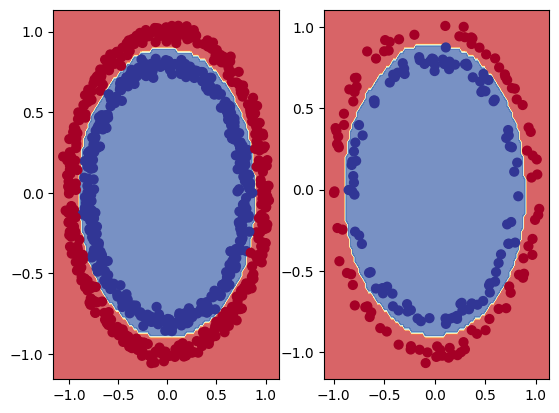

In [136]:
plt.subplot(1,2,1)
plot_decision_boundary(model, X_train,y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model, X_test,y_test)


In [141]:
X_new=np.array([0.1234,0.5678,0.2116,0.5678,0.9876,0.6543]).reshape(3,2)

X_new_tensor=torch.from_numpy(X_new).type(torch.float)

In [145]:
y_new=model(X_new_tensor)
y_new_ans=torch.round(torch.sigmoid(y_new))
y_new_ans

tensor([[1.],
        [1.],
        [0.]], grad_fn=<RoundBackward0>)

In [146]:
from pathlib import Path

model_path=Path("model")
model_path.mkdir(parents=True, exist_ok=True)

model_name="LogitsRegressionwithPytorch.pth"
model_save_path=model_path/model_name


torch.save(obj=model.state_dict(), f=model_save_path)


In [147]:
loaded_model=Circlemodel()
loaded_model.load_state_dict(torch.load(f=model_save_path))
loaded_model.to(device)

Circlemodel(
  (layer1): Linear(in_features=2, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=20, bias=True)
  (layer4): Linear(in_features=20, out_features=1, bias=True)
  (relu): ReLU()
)

In [148]:
loaded_model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.6974,  0.7045],
                      [ 0.7808, -0.6024],
                      [ 0.4705,  0.7789],
                      [-0.0620,  0.3146],
                      [ 0.5146, -0.1204],
                      [ 0.3017, -0.0704],
                      [ 0.6530, -0.2069],
                      [-0.7161, -0.5365],
                      [ 0.3472, -0.3123],
                      [ 0.5041, -0.8506],
                      [-0.6146, -0.2715],
                      [-0.8142, -0.8459],
                      [-0.3415, -0.3245],
                      [-0.3145, -0.5874],
                      [-0.5015, -0.2653],
                      [ 0.8887, -0.7596],
                      [-0.5580, -0.6722],
                      [ 0.0284, -0.5275],
                      [-0.8231, -0.7405],
                      [ 0.2842,  0.8467],
                      [-0.2816,  0.5544],
                      [-0.5492,  0.5753],
                      [ 0.7758,  0.0657],
   

In [149]:
y_new2=loaded_model(X_new_tensor)
y_new2_ans=torch.round(torch.sigmoid(y_new2))
y_new_ans==y_new2_ans

tensor([[True],
        [True],
        [True]])